# Tasks: cluster the images using K-Means and GMM with dimensionality reduction
Apply PCA and K-Means and GMM clustering to the Olivetti Faces dataset, visualize the clustering results, and then summarize the key differences and insights, discussing which method appears more effective.

## Load Olivetti Faces Dataset

### Subtask:
Load the Olivetti faces dataset using `sklearn.datasets.fetch_olivetti_faces()`.


The subtask requires loading the Olivetti Faces Dataset using `sklearn.datasets.fetch_olivetti_faces()`. This involves importing the function and then calling it to get the data and target, which should be stored in specified variables.



In [ ]:
from sklearn.datasets import fetch_olivetti_faces

# Load the Olivetti Faces dataset
faces_dataset = fetch_olivetti_faces()

# Store the images (data) in faces_data and target labels in faces_target
faces_data = faces_dataset.data
faces_target = faces_dataset.target

print("Shape of faces_data:", faces_data.shape)
print("Shape of faces_target:", faces_target.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Shape of faces_data: (400, 4096)
Shape of faces_target: (400,)


## Apply PCA for Dimensionality Reduction

### Subtask:
Apply Principal Component Analysis (PCA) using `sklearn.decomposition.PCA()` to reduce the dimensionality of the face images.


**Reasoning**:
The subtask requires applying PCA to reduce the dimensionality of the faces_data. This involves importing PCA, initializing it with n_components=100, fitting it to the data, transforming the data, and then printing the shape of the transformed data to verify the reduction.



In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with 100 components
pca = PCA(n_components=100)

# Fit PCA to the faces_data and transform it
faces_pca = pca.fit_transform(faces_data)

# Print the shape of the transformed data
print("Shape of faces_pca after dimensionality reduction:", faces_pca.shape)

Shape of faces_pca after dimensionality reduction: (400, 100)


## Perform K-Means Clustering

### Subtask:
Perform K-Means clustering on the PCA-transformed data.


**Reasoning**:
The subtask requires performing K-Means clustering on the PCA-transformed data. This involves importing the KMeans class, initializing it with specified parameters, fitting it to the `faces_pca` data, and storing the resulting cluster labels.



In [ ]:
from sklearn.cluster import KMeans

# Instantiate KMeans with n_clusters=40, random_state=42, init='k-means++' and n_init='auto'
kmeans = KMeans(n_clusters=40, random_state=42, init='k-means++', n_init='auto')

# Fit the KMeans model to the faces_pca data and get cluster labels
kmeans_labels = kmeans.fit_predict(faces_pca)

print("Shape of kmeans_labels:", kmeans_labels.shape)
print("First 10 KMeans labels:", kmeans_labels[:10])

Shape of kmeans_labels: (400,)
First 10 KMeans labels: [ 5 15  5  2 25  2  5 10  5 25]


## Perform GMM Clustering

### Subtask:
Perform Gaussian Mixture Model (GMM) clustering on the PCA-transformed data.


**Reasoning**:
The subtask requires performing GMM clustering on the PCA-transformed data. This involves importing the GaussianMixture class, initializing it with specified parameters, fitting it to the `faces_pca` data, predicting the cluster labels, and then printing the shape and first 10 labels for verification.



In [ ]:
from sklearn.mixture import GaussianMixture

# Instantiate GaussianMixture with n_components=40 and random_state=42
gmm = GaussianMixture(n_components=40, random_state=42)

# Fit the GMM model to the faces_pca data
gmm.fit(faces_pca)

# Get the cluster labels
gmm_labels = gmm.predict(faces_pca)

print("Shape of gmm_labels:", gmm_labels.shape)
print("First 10 GMM labels:", gmm_labels[:10])

Shape of gmm_labels: (400,)
First 10 GMM labels: [ 5 15  5  2 25  2  5 10  5 25]


## Visualize Clustering Results

### Subtask:
Visualize the clusters generated by K-Means and GMM using the first two principal components. Also, visualize the true labels for comparison.


**Reasoning**:
The subtask requires visualizing the K-Means, GMM, and true labels using scatter plots based on the first two principal components. This involves importing plotting libraries, creating three subplots, assigning x and y coordinates from `faces_pca`, coloring points by respective labels, and adding titles and labels.



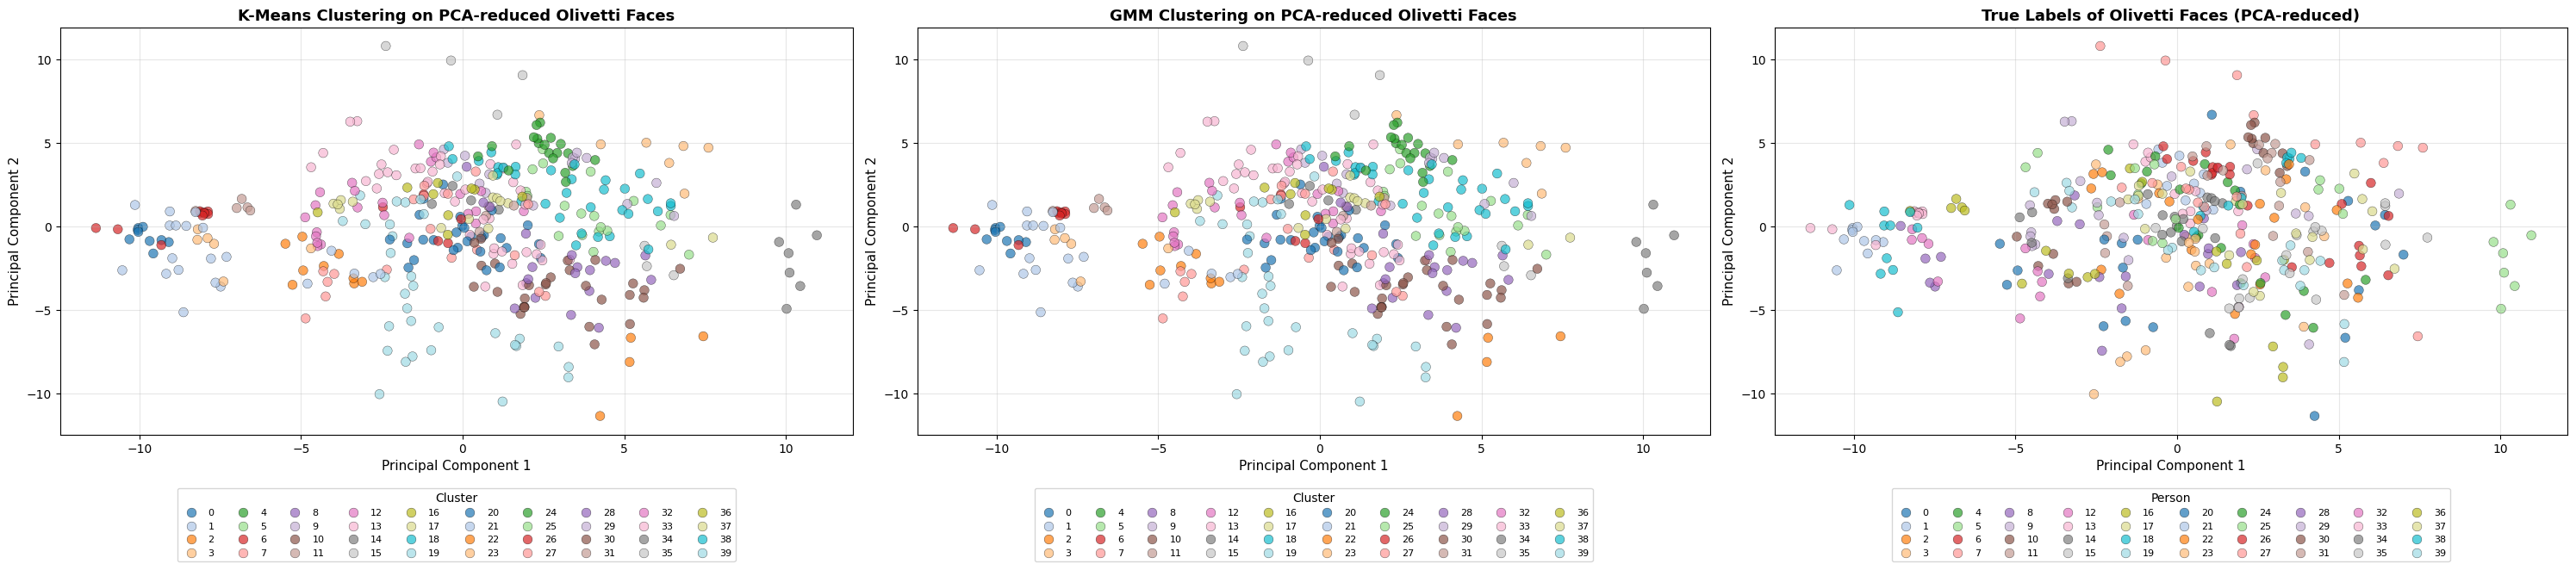

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(30, 6))

# Plot K-Means clustering results
sns.scatterplot(x=faces_pca[:, 0], y=faces_pca[:, 1], hue=kmeans_labels, palette='tab20', ax=axes[0], legend='full', s=60, edgecolor='black', linewidth=0.3, alpha=0.7)
axes[0].set_title('K-Means Clustering on PCA-reduced Olivetti Faces', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Principal Component 1', fontsize=11)
axes[0].set_ylabel('Principal Component 2', fontsize=11)
axes[0].legend(title='Cluster', loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=10, frameon=True, fontsize=8)
axes[0].grid(True, alpha=0.3)

# Plot GMM clustering results
sns.scatterplot(x=faces_pca[:, 0], y=faces_pca[:, 1], hue=gmm_labels, palette='tab20', ax=axes[1], legend='full', s=60, edgecolor='black', linewidth=0.3, alpha=0.7)
axes[1].set_title('GMM Clustering on PCA-reduced Olivetti Faces', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Principal Component 1', fontsize=11)
axes[1].set_ylabel('Principal Component 2', fontsize=11)
axes[1].legend(title='Cluster', loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=10, frameon=True, fontsize=8)
axes[1].grid(True, alpha=0.3)

# Plot true labels for comparison
sns.scatterplot(x=faces_pca[:, 0], y=faces_pca[:, 1], hue=faces_target, palette='tab20', ax=axes[2], legend='full', s=60, edgecolor='black', linewidth=0.3, alpha=0.7)
axes[2].set_title('True Labels of Olivetti Faces (PCA-reduced)', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Principal Component 1', fontsize=11)
axes[2].set_ylabel('Principal Component 2', fontsize=11)
axes[2].legend(title='Person', loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=10, frameon=True, fontsize=8)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Add space for legends at bottom
plt.show()

## Summary:

### Data Analysis Key Findings

*   The Olivetti Faces dataset, consisting of 400 images, each with 4096 features (pixels), was successfully loaded. Corresponding target labels (person IDs) were also loaded.
*   Principal Component Analysis (PCA) successfully reduced the dimensionality of the face images from 4096 features to 100 principal components, resulting in a dataset of shape (400, 100).
*   Both K-Means and Gaussian Mixture Model (GMM) clustering algorithms were applied to the PCA-transformed data, each configured to identify 40 clusters (corresponding to the 40 individuals in the dataset).
*   Visualizations of K-Means and GMM clustering results, alongside the true labels, using the first two principal components, were generated.
*   **Visual Inspection of Clustering Effectiveness:**
    *   **K-Means Clustering:** The scatter plot for K-Means shows somewhat defined clusters, but there's significant overlap, indicating that it doesn't perfectly separate the face groups based on the first two principal components. The clusters appear more globular.
    *   **GMM Clustering:** The GMM plot also exhibits overlapping clusters. However, compared to K-Means, GMM's clusters might appear slightly more spread out or elongated, reflecting its ability to model elliptical distributions, which could potentially capture more nuanced structures.
    *   **True Labels:** The true labels plot reveals a high degree of overlap even among distinct individuals when projected onto the first two principal components. This suggests that even with ideal clustering, clear visual separation of 40 distinct groups based solely on these two components is challenging.

### Insights or Next Steps

*   Both K-Means and GMM, when visualized with only the first two principal components, show considerable overlap, indicating that these two components alone are insufficient to clearly distinguish the 40 different individuals in the Olivetti Faces dataset. This suggests that the inherent variability between individuals might be subtle or distributed across higher-dimensional components.
*   To get a more comprehensive understanding of the clustering performance, evaluating clustering metrics like Adjusted Rand Index (ARI), Normalized Mutual Information (NMI), or Silhouette Score against the true labels would be crucial. These metrics can quantitatively assess how well the clusters align with the actual identities, beyond visual inspection of 2D projections.
